<a href="https://colab.research.google.com/github/lerj2710/predicci-n-del-rendimiento/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#importando las liberias
import pandas as pd
import numpy as np
#modelos de regresion y desicion
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# conectando el cuaderno actual al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#convertir datos en DataFrame en pandas
data = pd.read_csv('/content/drive/MyDrive/student-mat.csv', sep=';')

In [37]:
#Identificando valores faltantes && analisis explotatorio
maxGrade =20;
isApproved = data.G3 >= maxGrade / 2
data['Situation'] = isApproved

In [38]:
#Aprovados y Reprobados
data.Situation = data.Situation.map({ True: 'Approved', False: 'Reproved'})

In [39]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Situation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Reproved
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Reproved
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Approved
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Approved
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,Reproved
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,Approved
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,Reproved
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,Approved


In [40]:
# transformando los datos para visualizarlos
data= data.apply(preprocessing.LabelEncoder().fit_transform)

In [41]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Situation
0,0,0,3,1,0,0,4,4,0,4,...,2,3,0,0,2,6,2,3,3,1
1,0,0,2,1,0,1,1,1,0,2,...,2,2,0,0,2,4,2,2,3,1
2,0,0,0,1,1,1,1,1,0,2,...,2,1,1,2,2,10,4,5,7,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,0,0,4,2,12,11,12,0
4,0,0,1,1,0,1,3,3,2,2,...,2,1,0,1,4,4,3,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,5,1,1,0,2,2,3,3,...,4,3,3,4,3,11,6,6,6,1
391,1,1,2,1,1,1,3,1,3,3,...,3,4,2,3,1,3,11,13,13,0
392,1,1,6,0,0,1,1,1,2,2,...,4,2,2,2,2,3,7,5,4,1
393,1,1,3,0,1,1,3,2,3,2,...,3,0,2,3,4,0,8,9,7,0


In [49]:
#Eliminando etiqueta especifica
x = data.drop(columns=['Situation', 'G3'])
y = data['Situation']

#dividiendo los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                    test_size= 0.3,
                                                     random_state=42 )

In [43]:
#regresion lineal
model = LogisticRegression(verbose=10, solver='lbfgs',
                           max_iter=10000).fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0])

In [72]:
#impresion de resultado
pd.DataFrame({'pred': y_pred, 'resp': y_test})

,pred,resp
78,1,0
371,0,0
248,1,1
55,0,0
390,1,1
...,...,...
281,0,0
245,0,0
250,1,1
218,1,1


In [45]:
#calculando de presicion && r2
accuracy_score(y_test, y_pred)

0.9243697478991597

In [65]:
def print_metrics(y_test, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("R2: ", r2)
    print("MSE: ", mean_squared_error(y_test, y_pred))


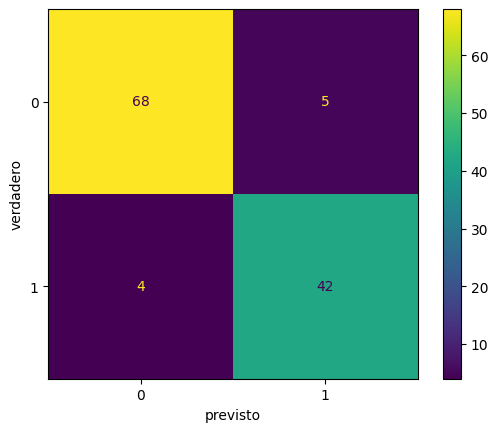

In [66]:
# grafica de valores
confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
fig, ax = disp.figure_, disp.ax_
ax.set_xlabel("previsto")
ax.set_ylabel("verdadero")
plt.show()

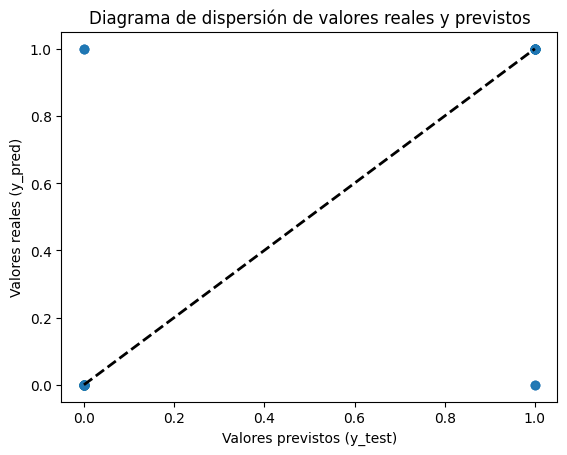

In [69]:
#Creando una dispersión de valores reales y previstos
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.6)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Valores previstos (y_test)")
plt.ylabel("Valores verdaderos (y_pred)")
plt.title("Diagrama de dispersión de valores reales y previstos")
plt.show()